<a href="https://colab.research.google.com/github/kaajalguptaa/Data-Science-Projects-/blob/main/Female_foeticide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVERVIEW**

* Female foeticide is the illegal practice of selectively aborting a female fetus after determining its sex.

* Problem type - Multiclass classification


**REASONS**

* **cultural preference for sons** -  This practice leads to a severely skewed male-to-female sex ratio in affected regions.

* **Misuse of Modern technologies**  like ultrasounds originally developed to detect fetal abnormalities, are misused for prenatal sex determination, enabling **sex-selective abortions**

* **Weak social security** -  parents may feel that having sons is the only way to ensure they will be cared for in their old age.

**PROBLEM DESCRIPTION**

* Predicting the level of female foeticide risk (Low / Medium / High)

* Analysing the feature importance to identify main causes (poverty, literacy gap,etc)



**FEATURES**

The dataset mainly consists of information on the population with  place, Gender, Economic condition, Health facilities, Employment rate, Education and their life style

* There are 13 columns in this dataset,where the

**district_name** - consists of **unique** districs/town name

**state**     
**risk_level** - This is the **target** column

**TOOLS FOR EXPLOARTORY DATA ANALYSIS**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# PLOTS TO APPEAR INSIDE LIBRABY

%matplotlib inline

In [127]:
# MODELS FROM SCIKIT LEARN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [128]:
# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

**IGNORING WARNINGS**

In [129]:
import warnings
warnings.filterwarnings('ignore')

**IMPORTING THE DATA SET:**


**Data** - has the csv file with dataset

In [142]:
data = pd.read_csv('/content/female_foeticide_risk.csv')

In [143]:
data

,district_name,state,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level
0,Darbhanga,Bihar,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,Medium
1,Bharatpur,Rajasthan,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,Medium
2,Patna,Bihar,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,Medium
3,Bhavnagar,Gujarat,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,Medium
4,Junagadh,Gujarat,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vadodara,Gujarat,51.08,82.10,961.0,28271.0,0.647,2335.7,31.2,96.4,29.5,9.0,High
996,Thane,Maharashtra,77.47,81.43,945.0,20278.0,0.467,3828.8,13.7,66.8,43.6,9.0,Low
997,Ludhiana,Punjab,70.70,80.20,969.0,14243.0,0.181,2074.4,43.4,54.0,26.1,19.0,Low
998,Mumbai,Maharashtra,58.07,NaN,919.0,17217.0,0.265,2456.3,31.9,23.4,26.7,14.0,Medium


**BASIC CHECKS**

In [144]:
data.head()

,district_name,state,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level
0,Darbhanga,Bihar,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,Medium
1,Bharatpur,Rajasthan,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,Medium
2,Patna,Bihar,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,Medium
3,Bhavnagar,Gujarat,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,Medium
4,Junagadh,Gujarat,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,High


In [145]:
data.shape

(1000, 13)

* This data set has 1000 rows and 13 columns

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   district_name                     984 non-null    object 
 1   state                             990 non-null    object 
 2   literacy_rate_female              990 non-null    float64
 3   literacy_rate_male                979 non-null    float64
 4   sex_ratio                         993 non-null    float64
 5   avg_household_income              993 non-null    float64
 6   poverty_index                     987 non-null    float64
 7   education_expenditure_per_capita  991 non-null    float64
 8   female_infant_mortality_rate      995 non-null    float64
 9   access_to_health_facilities       992 non-null    float64
 10  employment_rate_female            989 non-null    float64
 11  social_awareness_programs         991 non-null    float64
 12  risk_le

In [147]:
data.columns

Index(['district_name', 'state', 'literacy_rate_female', 'literacy_rate_male',
       'sex_ratio', 'avg_household_income', 'poverty_index',
       'education_expenditure_per_capita', 'female_infant_mortality_rate',
       'access_to_health_facilities', 'employment_rate_female',
       'social_awareness_programs', 'risk_level'],
      dtype='object')

* **Categorical** column - 'district_name', 'state'

* **Numerical** column - 'literacy_rate_female','literacy_rate_male', 'sex_ratio', 'avg_household_income','poverty_index', 'education_expenditure_per_capita', 'female_infant_mortality_rate', 'access_to_health_facilities', 'employment_rate_female', 'social_awareness_programs'



In [148]:
data.describe()

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs
count,990.000000,979.000000,993.000000,993.000000,987.000000,991.000000,995.000000,992.000000,989.000000,991.000000
mean,65.329545,79.828458,923.910373,18088.021148,0.487788,2507.454490,29.323216,69.646270,35.476239,9.804238
std,10.048246,5.106745,49.350060,5012.453343,0.292999,796.363711,10.009641,18.455596,10.106227,5.726072
min,32.490000,62.700000,763.000000,5000.000000,0.001000,500.000000,5.000000,10.000000,5.000000,0.000000
25%,58.550000,76.425000,892.000000,14653.000000,0.238000,1953.000000,22.300000,57.150000,28.500000,5.000000
50%,65.285000,79.830000,925.000000,18155.000000,0.485000,2490.900000,29.400000,70.600000,35.500000,10.000000
75%,72.217500,83.260000,957.000000,21477.000000,0.738500,3043.600000,36.350000,83.500000,42.000000,15.000000
max,94.720000,94.960000,1050.000000,31996.000000,0.999000,5175.400000,59.100000,100.000000,68.000000,19.000000


* **Describe** - gives the **statistical** information on above numerical dataset

In [149]:
data.describe(include = 'O')

,district_name,state,risk_level
count,984,990,1000
unique,100,10,3
top,Ajmer,Maharashtra,Low
freq,16,114,334


* Above describe gives information on **categorical** data(Object)

* Total no of numerical column - **10**

* Total no of categorical column - **3**

#### **EXPLORATORY DATA ANALYSIS**

* To analyzing the dataset and display the report

**DATASET** - data has both dependent and independent data

Considering,

**x** - independent data set

**y** - dependent data (**Target variable**)

In [150]:
# x = data.iloc[:,:-1]

In [151]:
# y = data.iloc[:, -1]

**UNIVARIATE ANALYSIS** - numerical features


In [152]:
# numerical columns
numerical_col = ['literacy_rate_female','literacy_rate_male', 'sex_ratio', 'avg_household_income',
                       'poverty_index', 'education_expenditure_per_capita', 'female_infant_mortality_rate',
                       'access_to_health_facilities', 'employment_rate_female', 'social_awareness_programs']


In [153]:
for col in numerical_col:
    print(f"Visualizing column: {col}")

Visualizing column: literacy_rate_female
Visualizing column: literacy_rate_male
Visualizing column: sex_ratio
Visualizing column: avg_household_income
Visualizing column: poverty_index
Visualizing column: education_expenditure_per_capita
Visualizing column: female_infant_mortality_rate
Visualizing column: access_to_health_facilities
Visualizing column: employment_rate_female
Visualizing column: social_awareness_programs


**Histogram and box plot**

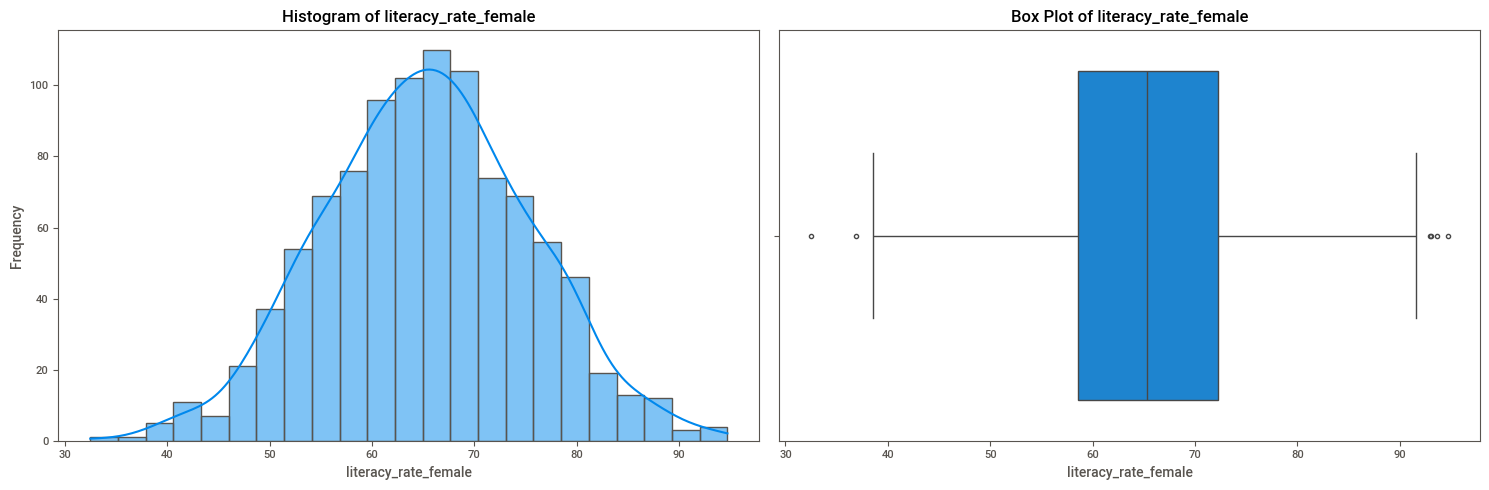

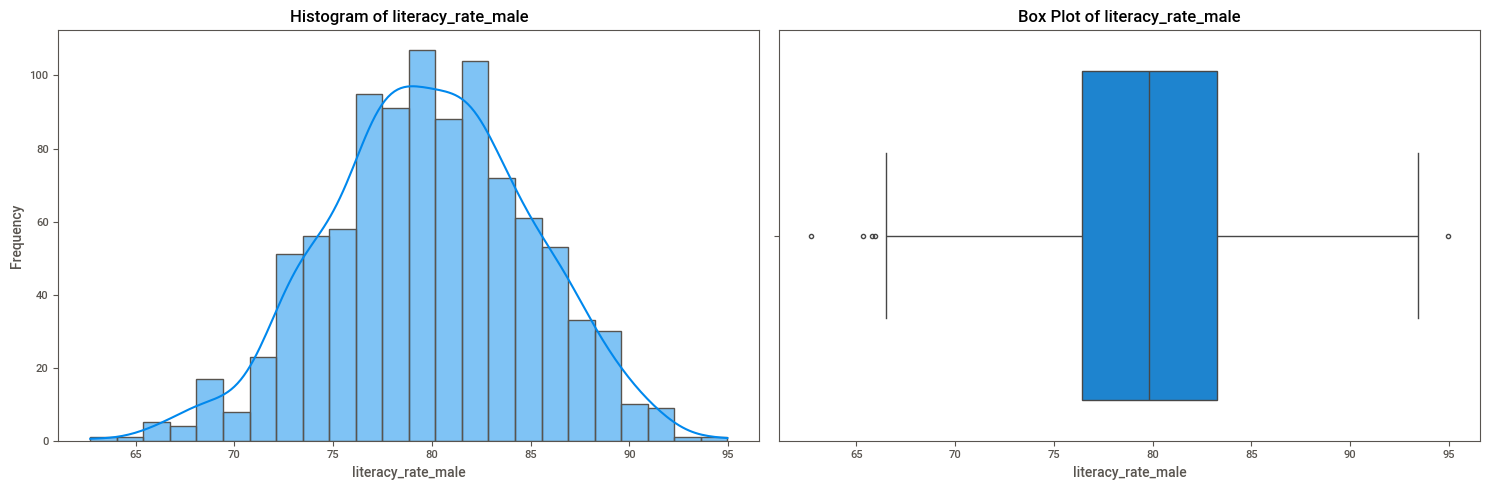

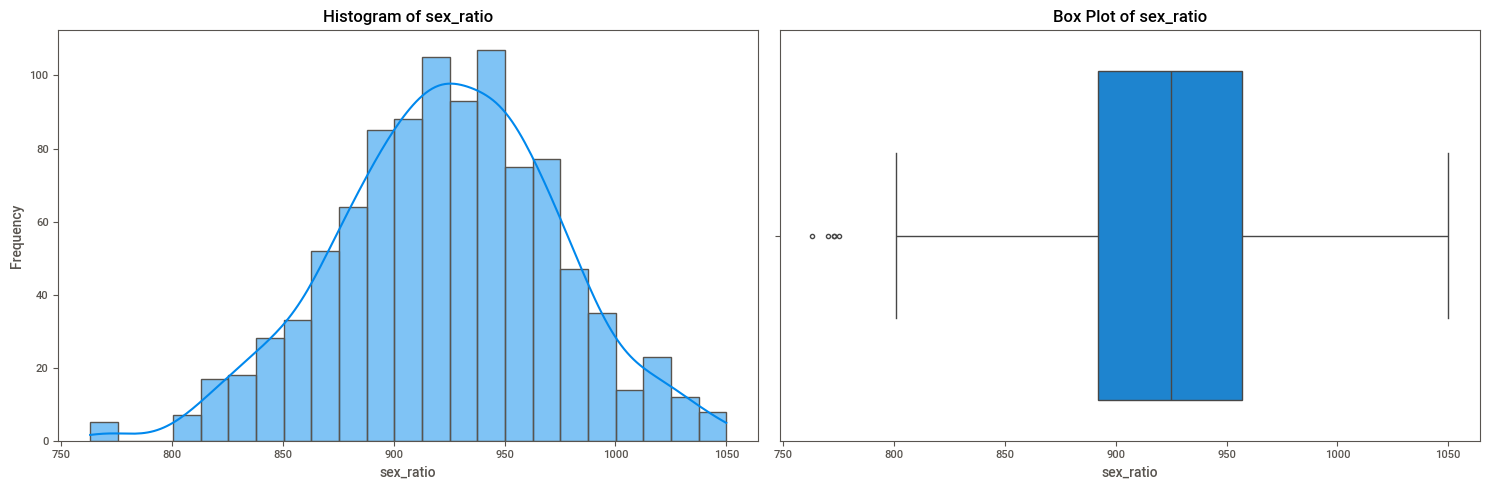

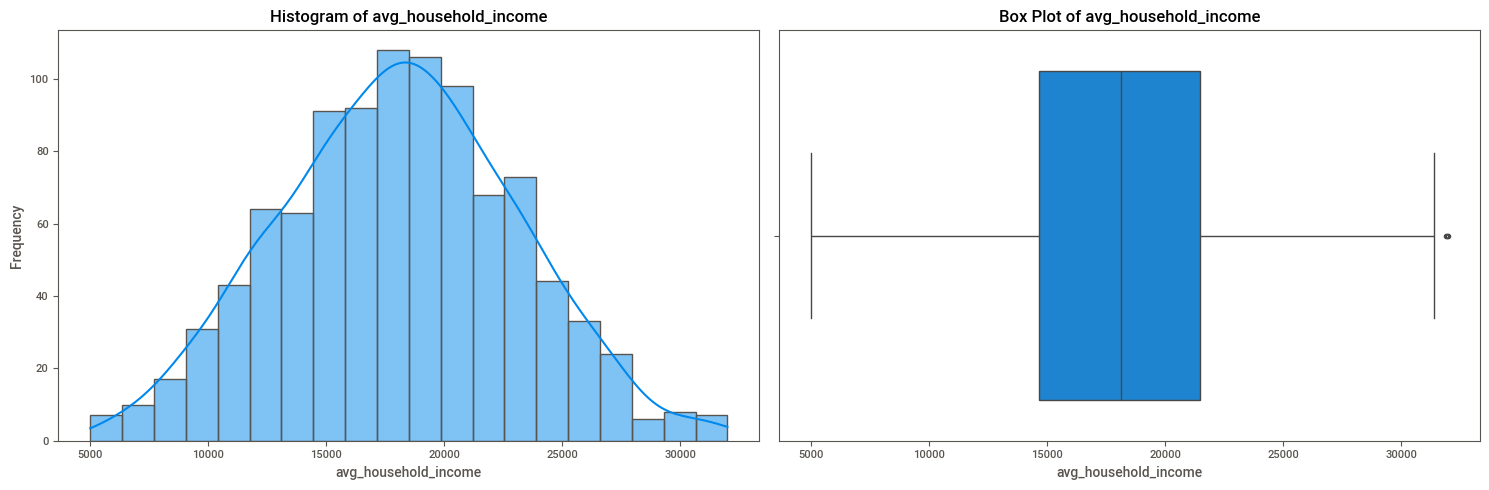

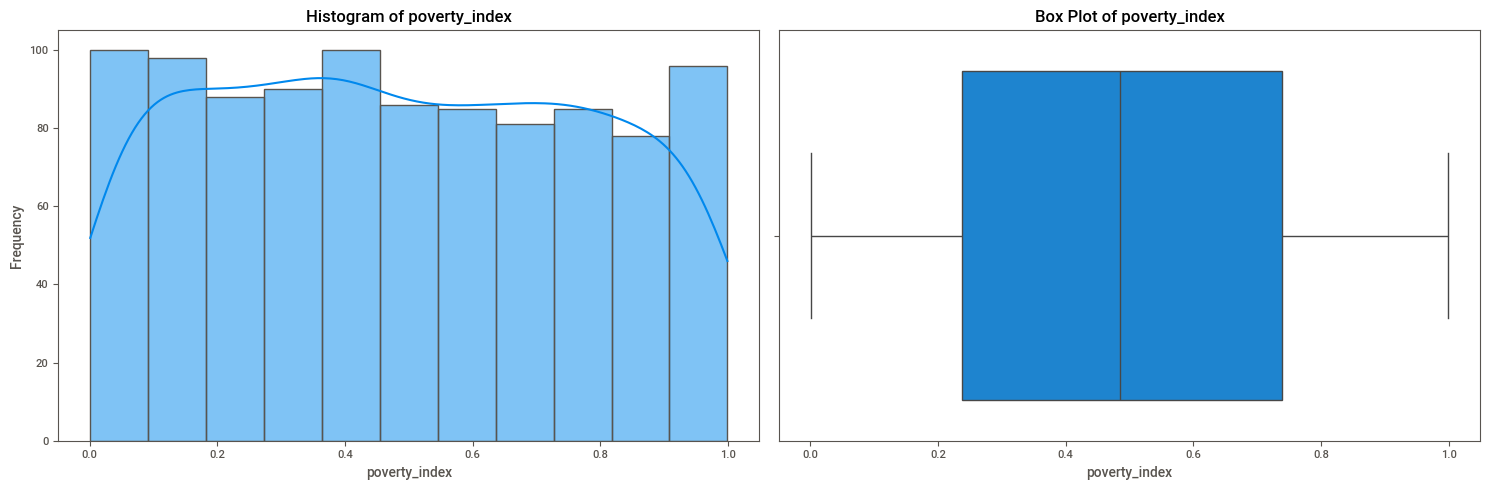

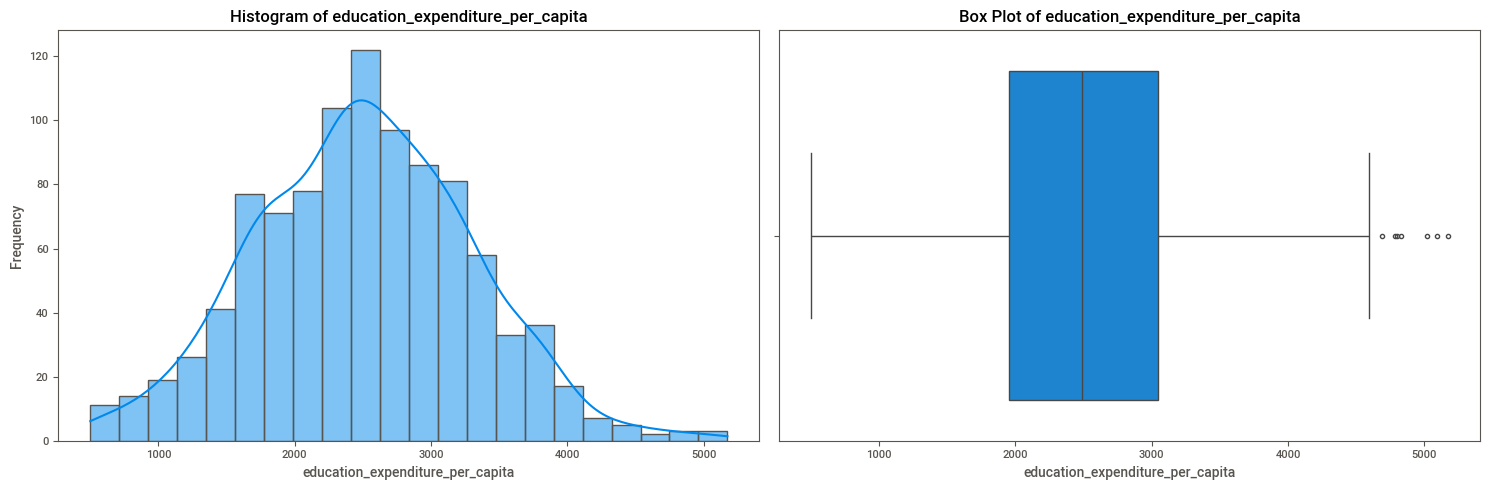

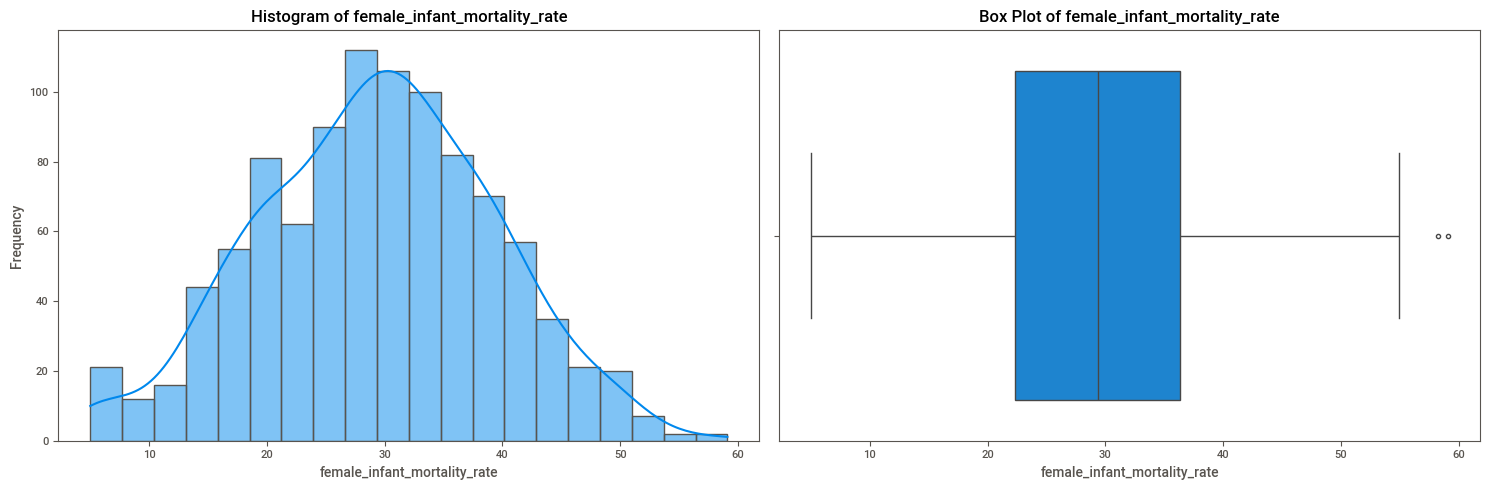

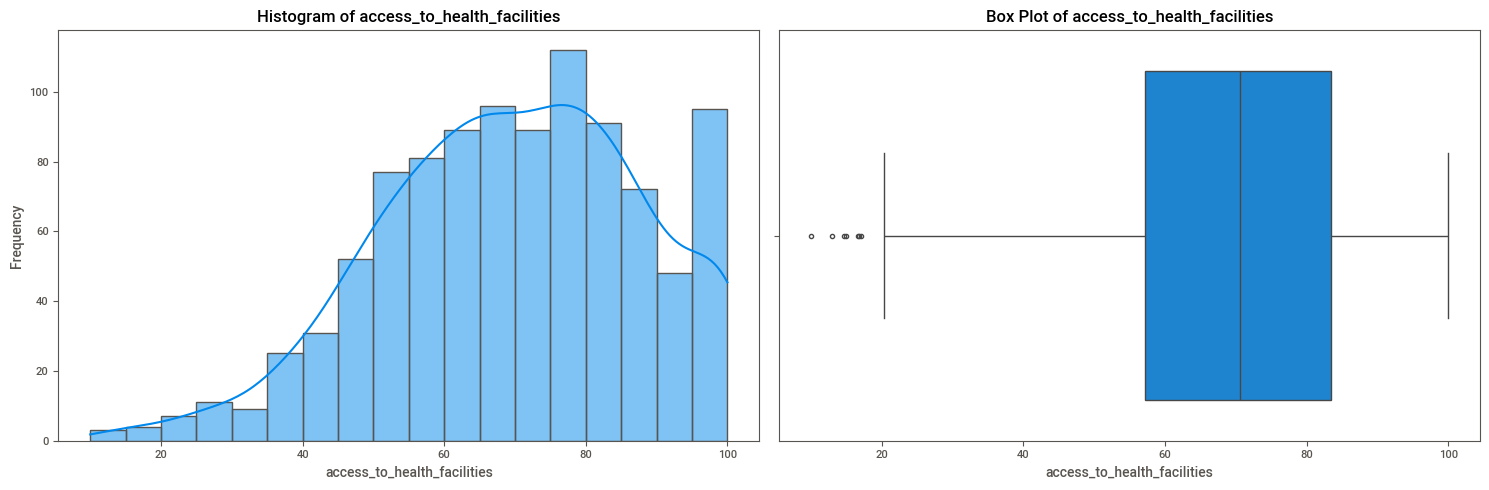

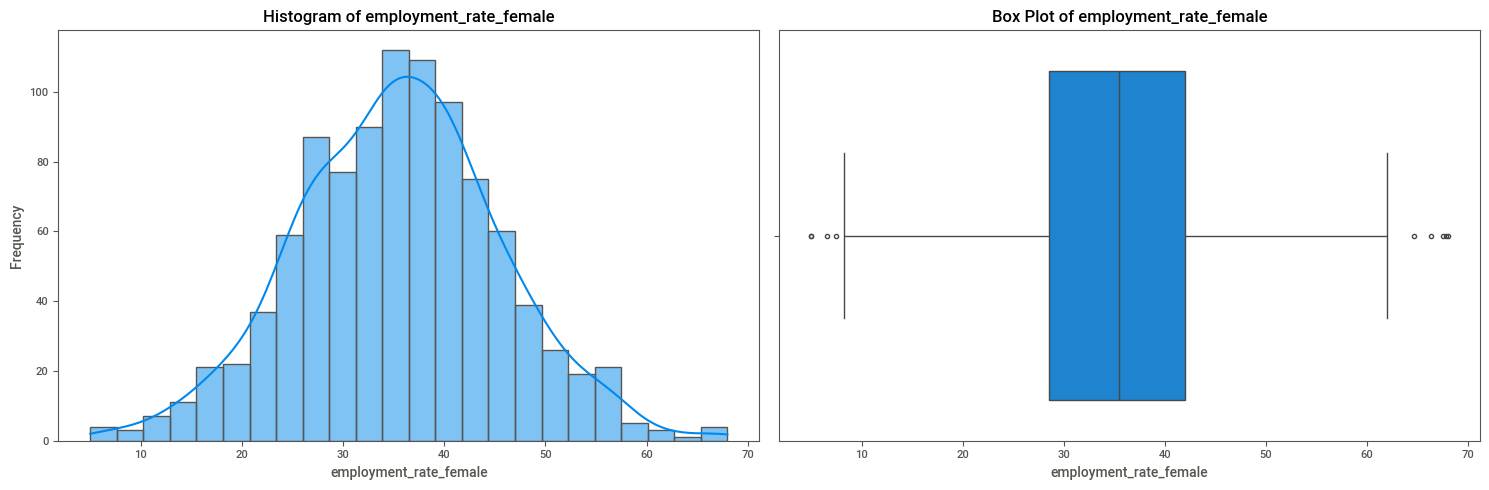

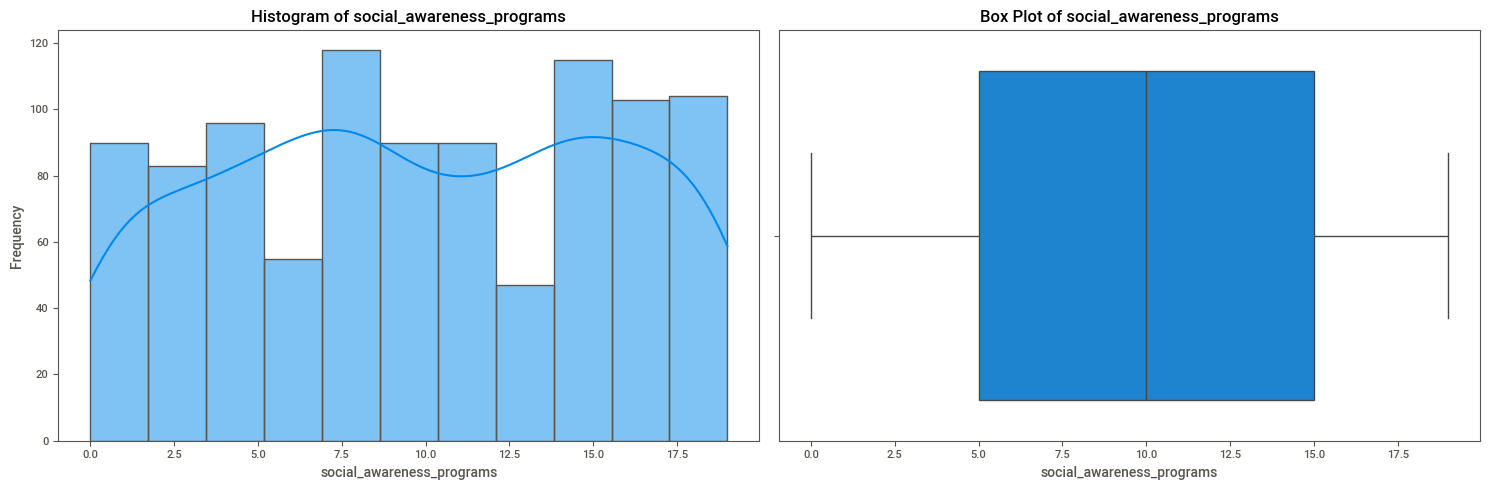

In [154]:
for col in numerical_col:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot histogram
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Plot box plot
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

INSIGHTS FROM THE ABOVE UNIVARIATE DATA :



* **Literacy Rate (Female and Male)** - the box plots clearly shows **outliers** on the lower end for female literacy rate(below 40)

*   **Sex Ratio -** box plot highlights **outliers** on both the lower and higher ends  with skewed sex ratios (either much lower or much higher than the typical range), around **800**

*   **Average Household Income-** The histogram has a **strong right-skew**, many districts have lower average incomes,

*   **Poverty Index-** The distribution appears somewhat spread out. The box plot shows some **outliers**, suggesting a few districts have unusually high or low poverty indices compared to the majority.

*   **Female Infant Mortality Rate-** The distribution is  normal, the higher mortality rate side, says districts with worse infant mortality outcomes for females, around **60**

*   **Access to Health Facilities-** few districts have poor access, that is **below 20**

*   **Employment Rate (Female)-**  The box plot shows **outliers** on both the lower and higher ends, indicating some districts have unusually low or high female employment rates.

*   **Social Awareness Programs:** The box plot indicates in the number of social awareness programs across districts and it is **normal**


In [155]:
data.isna().sum()

,0
district_name,16
state,10
literacy_rate_female,10
literacy_rate_male,21
sex_ratio,7
avg_household_income,7
poverty_index,13
education_expenditure_per_capita,9
female_infant_mortality_rate,5
access_to_health_facilities,8


**Handling missing data**

**Numerical data**

In [156]:
numerical_cols_with_missing = data[numerical_col].columns[data[numerical_col].isnull().any()].tolist()

for col in numerical_cols_with_missing:
    data[col].fillna(data[col].median(), inplace=True)


**Categorical data**

In [157]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [158]:

categorical_cols_with_missing = [col for col in categorical_cols if data[col].isnull().any()]

for col in categorical_cols_with_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [159]:
data.isnull().sum()

,0
district_name,0
state,0
literacy_rate_female,0
literacy_rate_male,0
sex_ratio,0
avg_household_income,0
poverty_index,0
education_expenditure_per_capita,0
female_infant_mortality_rate,0
access_to_health_facilities,0


In [160]:
categorical_cols

['district_name', 'state', 'risk_level']

**Encoding the categorical columns**

In [161]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

* **state**

In [162]:
data.state.value_counts()

,count
state,
Maharashtra,124
Madhya Pradesh,111
Punjab,105
Rajasthan,105
Haryana,98
Gujarat,95
West Bengal,93
Uttar Pradesh,93
Bihar,91


In [163]:
state_encoded = encoder.fit_transform(data['state'].values.reshape(-1, 1))
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['state']))

data = pd.concat([data.drop('state', axis=1), state_encoded_df], axis=1)

* **risk_level**

In [164]:
data.risk_level.value_counts()

,count
risk_level,
Low,334
Medium,333
High,333


In [165]:
from sklearn.preprocessing import OrdinalEncoder

risk_level_order = [['Low', 'Medium', 'High']]
ordinal_encoder = OrdinalEncoder(categories=risk_level_order)
data['risk_level'] = ordinal_encoder.fit_transform(data[['risk_level']])

In [166]:
data.risk_level

,risk_level
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
995,2.0
996,0.0
997,0.0
998,1.0


In [167]:
data = data.drop('district_name', axis=1)
display(data.head())

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level,state_Bihar,state_Gujarat,state_Haryana,state_Madhya Pradesh,state_Maharashtra,state_Odisha,state_Punjab,state_Rajasthan,state_Uttar Pradesh,state_West Bengal
0,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

X = data.drop('risk_level', axis=1)
y = data['risk_level']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1000, 20)
Target (y) shape: (1000,)


In [169]:
X

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,state_Bihar,state_Gujarat,state_Haryana,state_Madhya Pradesh,state_Maharashtra,state_Odisha,state_Punjab,state_Rajasthan,state_Uttar Pradesh,state_West Bengal
0,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,51.08,82.10,961.0,28271.0,0.647,2335.7,31.2,96.4,29.5,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,77.47,81.43,945.0,20278.0,0.467,3828.8,13.7,66.8,43.6,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,70.70,80.20,969.0,14243.0,0.181,2074.4,43.4,54.0,26.1,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,58.07,79.83,919.0,17217.0,0.265,2456.3,31.9,23.4,26.7,14.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [170]:
y

,risk_level
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
995,2.0
996,0.0
997,0.0
998,1.0


In [171]:
data.head()

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level,state_Bihar,state_Gujarat,state_Haryana,state_Madhya Pradesh,state_Maharashtra,state_Odisha,state_Punjab,state_Rajasthan,state_Uttar Pradesh,state_West Bengal
0,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:

pd.set_option('display.max_columns', None)


In [173]:
display(data.head())

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level,state_Bihar,state_Gujarat,state_Haryana,state_Madhya Pradesh,state_Maharashtra,state_Odisha,state_Punjab,state_Rajasthan,state_Uttar Pradesh,state_West Bengal
0,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Splitting data**

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [175]:

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(800, 20) (800,) (200, 20) (200,)


Now we've got our data splitted into training and testing sets, it's time to build a machine learning model.

We'll Train it (finding patterns) on the training set.

and then test it testing set

We're going to try 3 different Machine Learning Model:

* Logistic Regression
* K-Nearest neighbours Classifer
* RandomForestClassifer

* Creating a function

  * placing models inside dictionary

In [176]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

In [177]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores ={}         # keeps model scores
  for name, model in models.items():      # Loop through models
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [178]:
%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train = y_train,
                             y_test = y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [179]:
model_scores

{'Logistic Regression': 0.365, 'KNN': 0.365, 'Random Forest': 0.85}

***Model comparision***

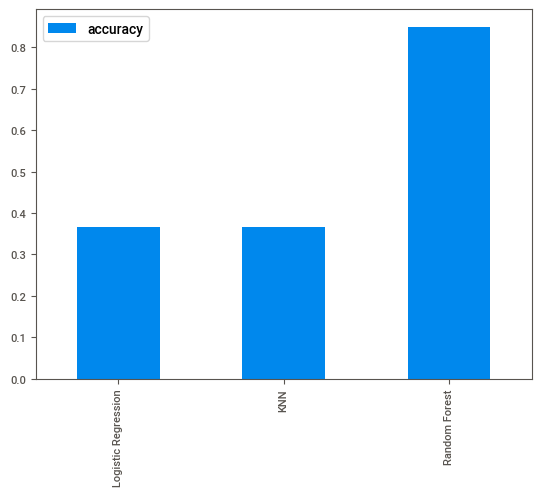

In [180]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

* KNN performs worst, and **RandomForestClassifer** performs **best** while Logistic regression was slightly behind

* model's first predictions aren't always best.

so Hyperparameter Tuning

**Tuning the model**

In [181]:
train_scores = []
test_scores = []

In [182]:
neighbours = range(1,10)   #list of values of n_neighbours

knn = KNeighborsClassifier()
for i in neighbours:
  knn.set_params(n_neighbors = i)


  knn.fit(X_train, y_train)   # Fit  algorithm
  train_scores.append(knn.score(X_train, y_train)) # Update training score

  test_scores.append(knn.score(X_test, y_test))   # Update the test score


In [183]:
train_scores

[1.0, 0.655, 0.6475, 0.60875, 0.555, 0.53875, 0.5125, 0.4925, 0.47625]

In [184]:
test_scores

[0.34, 0.36, 0.365, 0.36, 0.365, 0.33, 0.35, 0.32, 0.36]

Maximum KNN score on the test data: 36.50%
Maximum KNN score on the Train data: 100.00%


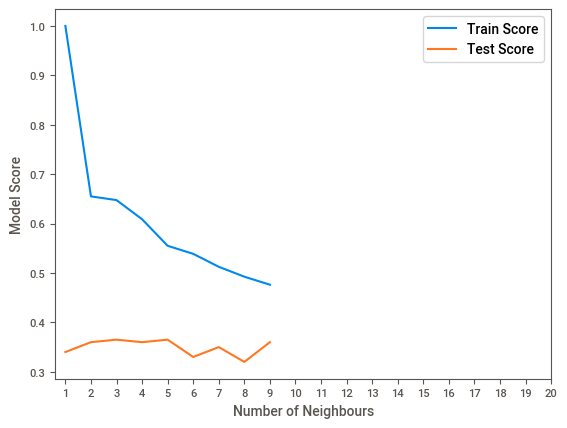

In [185]:
plt.plot(neighbours, train_scores, label = "Train Score")
plt.plot(neighbours, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
print(f"Maximum KNN score on the Train data: {max(train_scores)*100:.2f}%")

So we Tuned KNN and got 36% as best score after trying it with different numbers of neighbours, so now lets tune other models

tuning **RandomForestClassifer**

In [187]:
# Define the hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [1.0, "sqrt", "log2"]} # Use float or string for max_features

%time
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20, # Number of parameter settings that are sampled
                           cv=5, # Cross-validation fold
                           verbose=True)

rs_rf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [1.0, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [188]:
rs_rf = RandomForestClassifier(max_depth= None,
                                min_samples_leaf= 1,
                                min_samples_split= 14,
                                n_estimators= 510)
rs_rf.fit(X_train,y_train)


RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [192]:

rs_rf.score(X_test, y_test)


0.83

**Evaluating**  Tuned Machine Learning Model Classifier

* ROC curve and AUC score
* Confusion Matrix
* Classification Reports
* Precision
* Recall
* F1-score

In [193]:
model_scores

{'Logistic Regression': 0.365, 'KNN': 0.365, 'Random Forest': 0.85}

So Tuned **RandomForest Regressor** is the best model, so rs_rf is  final model

In [194]:

y_preds = rs_rf.predict(X_test)

In [195]:

y_preds[:10]


array([1., 0., 0., 1., 0., 0., 2., 0., 0., 1.])

In [196]:

y_test[:10]


,risk_level
31,1.0
805,0.0
413,0.0
746,1.0
796,1.0
570,1.0
581,2.0
593,0.0
86,0.0
411,1.0


**Plotting ROC Curve and calculate AUC Metric**

In [200]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    visualizer = ROCAUC(model, encoder={0: 'Low Risk',
                                        1: 'Medium Risk',
                                        2: 'High Risk'})
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    return visualizer

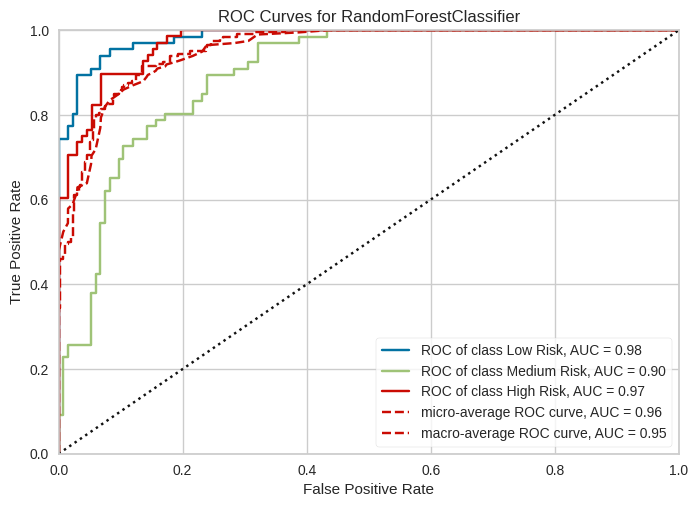

In [201]:
plot_ROC_curve(rs_rf, X_train, y_train, X_test, y_test);


INSIGHTS FROM ABOVE RECEIVER OPERATING CHARACTERISTIC CURVE :

   * The area under curve in ROC for the class **low risk** is 0.98
   * The area under curve in ROC for the class **medium risk** is 0.90
   * The area under curve in ROC for the class **high risk** is 0.97

   

**Confusion Matrix**

In [202]:

print(confusion_matrix(y_test, y_preds))

[[59  7  0]
 [ 7 50  9]
 [ 0 11 57]]


**Plotting Confusion Matrix**

* plotting using heatmap

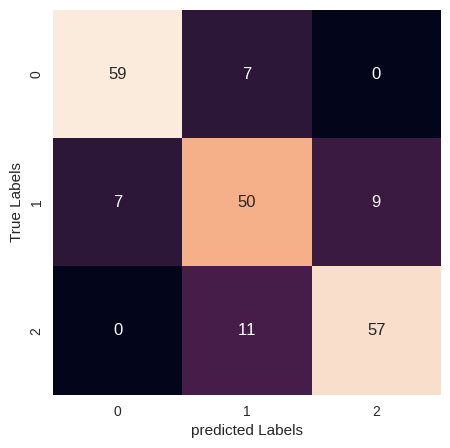

In [203]:
def plot_conf_mat(y_test, y_preds):

  fig, ax = plt.subplots(figsize=(5, 5))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("predicted Labels")
  plt.ylabel("True Labels")

plot_conf_mat(y_test, y_preds)

In [204]:

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        66
         1.0       0.74      0.76      0.75        66
         2.0       0.86      0.84      0.85        68

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



**Calculating Evaluation matircs using cross-validation**

In [205]:
clf = RandomForestClassifier(max_depth= None,
                                min_samples_leaf= 1,
                                min_samples_split= 14,
                                n_estimators= 510)

**Cross-validated accuracy**

In [206]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.855, 0.86 , 0.885, 0.855, 0.84 ])

In [207]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.859)

**Cross-validated precision**

In [208]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(nan)

In [209]:

cv_precision = np.mean(cv_precision)
cv_precision


np.float64(nan)

**Cross-validated recall**


In [210]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([nan, nan, nan, nan, nan])

In [ ]:

cv_recall = np.mean(cv_recall)
cv_recall

**Cross-validated f1-score**

In [211]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1


array([nan, nan, nan, nan, nan])

In [212]:
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(nan)

**RESULT**

* Tuned RandomForest Regressor is the best model, so rs_rf is final model with 85% accuracy

## **THANK YOU**